# COSC 322 Lab \#5

T.J. Liggett & Izzy Sommers

## Following the tutorial on Gadfly.jl (http://gadflyjl.org/), a Grammer-of-Graphics plotting package that is similar in functionality to Ggplot2, reproduce the 10 plots shown in the tutorial.  Save them in HTML format or use a Jupyter notebook.

In [1]:
using Gadfly, RDatasets

In [2]:
iris = dataset("datasets", "iris")

150×5 DataFrame
 Row │ SepalLength  SepalWidth  PetalLength  PetalWidth  Species   
     │ Float64      Float64     Float64      Float64     Cat…      
─────┼─────────────────────────────────────────────────────────────
   1 │         5.1         3.5          1.4         0.2  setosa
   2 │         4.9         3.0          1.4         0.2  setosa
   3 │         4.7         3.2          1.3         0.2  setosa
   4 │         4.6         3.1          1.5         0.2  setosa
   5 │         5.0         3.6          1.4         0.2  setosa
   6 │         5.4         3.9          1.7         0.4  setosa
   7 │         4.6         3.4          1.4         0.3  setosa
   8 │         5.0         3.4          1.5         0.2  setosa
   9 │         4.4         2.9          1.4         0.2  setosa
  10 │         4.9         3.1          1.5         0.1  setosa
  11 │         5.4         3.7          1.5         0.2  setosa
  ⋮  │      ⋮           ⋮            ⋮           ⋮           ⋮
 141 │         6.7         3.1          5.6         2.4  virginica
 142 │         6.9         3.1          5.1         2.3  virginica
 143 │         5.8         2.7          5.1         1.9  virginica
 144 │         6.8         3.2          5.9         2.3  virginica
 145 │         6.7         3.3          5.7         2.5  virginica
 146 │         6.7         3.0          5.2         2.3  virginica
 147 │         6.3         2.5          5.0         1.9  virginica
 148 │         6.5         3.0          5.2         2.0  virginica
 149 │         6.2         3.4          5.4         2.3  virginica
 150 │         5.9         3.0          5.1         1.8  virginica
                                                   129 rows omitted

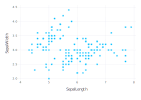

In [3]:
plot(iris, x=:SepalLength, y=:SepalWidth)

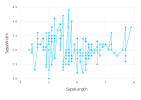

In [4]:
plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point, Geom.line)

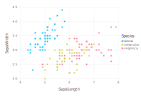

In [5]:
SepalLength = iris.SepalLength
SepalWidth = iris.SepalWidth
Color = iris.Species
plot(x=SepalLength, y=SepalWidth, color=Color, Geom.point,
     Guide.xlabel("SepalLength"), Guide.ylabel("SepalWidth"),
     Guide.colorkey(title="Species"))

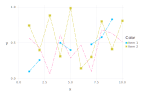

In [6]:
y1 = [0.1, 0.26, NaN, 0.5, 0.4, NaN, 0.48, 0.58, 0.83]
plot(x=1:9, y=y1, Geom.line, Geom.point,
        color=["Item 1"], linestyle=[:dash], size=[3pt],
    layer(x=1:10, y=rand(10), Geom.line, Geom.point,
        color=["Item 2"], size=[5pt], shape=[Shape.square]),
    layer(x=1:10, y=rand(10), color=[colorant"hotpink"],
        linestyle=[[8pt, 3pt, 2pt, 3pt]], Geom.line))

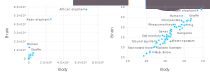

In [7]:
set_default_plot_size(21cm ,8cm)
mammals = dataset("MASS", "mammals")
p1 = plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label)
p2 = plot(mammals, x=:Body, y=:Brain, label=:Mammal, Geom.point, Geom.label,
     Scale.x_log10, Scale.y_log10)
hstack(p1, p2)

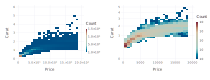

In [8]:
using Printf
Diamonds = dataset("ggplot2","diamonds")
p3= plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.x_continuous(format=:engineering) )
p4= plot(Diamonds, x=:Price, y=:Carat, Geom.histogram2d(xbincount=25, ybincount=25),
    Scale.x_continuous(format=:plain),
    Scale.y_sqrt(labels=y->@sprintf("%i", y^2)),
    Scale.color_log10(minvalue=1.0, maxvalue=10^4),
    Guide.yticks(ticks=sqrt.(0:5)) )
hstack(p3, p4)

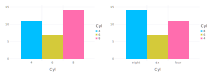

In [9]:
mtcars = dataset("datasets","mtcars")
 labeldict = Dict(4=>"four", 6=>"six", 8=>"eight")
p5 = plot(mtcars, x=:Cyl, color=:Cyl, Geom.histogram,
    Scale.x_discrete(levels=[4,6,8]), Scale.color_discrete(levels=[4,6,8]) )
p6 = plot(mtcars, x=:Cyl, color=:Cyl, Geom.histogram,
    Scale.x_discrete(labels=i->labeldict[i], levels=[8,6,4]),
    Scale.color_discrete(levels=[8,6,4]) )
hstack(p5, p6)

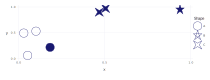

In [10]:
x, y = 0.55*rand(4), 0.55*rand(4)
plot( Coord.cartesian(xmin=0, ymin=0, xmax=1.0, ymax=1.0),
    layer(x=x, y=y, shape=["A"], alpha=["day","day","day","night"]),
    layer(x=1.0.-y[1:3], y=1.0.-x[1:3], shape=["B", "C","C"], alpha=["night"]),
    Scale.shape_discrete(levels=["A","B","C"]),
    Scale.alpha_discrete(levels=["day","night"]),
    Theme(discrete_highlight_color=identity, point_size=12pt,
   point_shapes=[Shape.circle, Shape.star1, Shape.star2], alphas=[0, 1.0],
         default_color="midnightblue" )
)

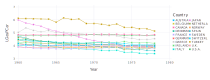

In [11]:
gasoline = dataset("Ecdat", "Gasoline")
plot(gasoline, x=:Year, y=:LGasPCar, color=:Country, Geom.point, Geom.line)

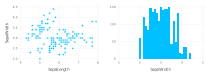

In [12]:
fig1a = plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point)
fig1b = plot(iris, x=:SepalWidth, Geom.bar)
fig1 = hstack(fig1a, fig1b)

## Write a summary paragraph of your findings/impressions.  Is this a language that you’d like to learn more about?  Once you overcame the initial learning curve, did you find it easy to use?

Julia seemed to make some nice graphics right away. We would probably need to go a little more under the hood to make graphics like that in R or Python. That is more of a tribute to Gadfly than to Julia itself. It would be interesting to explore if Gadfly is as customizable as ggplot2 or plotly.
From a usability standpoint, it wasn't that much different from using Python or R. We liked that it was easy to use with Jupyter Notebook. There were a couple of weird things we noticed. For example, using the basic Plots package at Gadfly in the same notebook threw some errors, which seems a little sloppy.
As far as the speed goes, we weren't very impressed. It did seem like the farther into it we got, the graphs were produced faster. Honestly, we wouldn't be sad if we didn't see this ever again, but we wouldn't be opposed to using it.